
# Import Python libraries.

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn==0.23.1

  Using cached https://files.pythonhosted.org/packages/70/8e/682770fc1da047bb56443150bfd8d87d850459cd7cc412a5311de3abaa4a/scikit_learn-0.23.1-cp37-cp37m-win_amd64.whl
  Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Datasets

In [37]:
train_data = pd.read_csv(r"Training Data.csv")
test_data = pd.read_csv(r"Test Data.csv")

In [38]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [39]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Check how train dataset looks like.

In [40]:
# One-Hot Encoding - Train Data
train_data = train_data.merge(pd.get_dummies(train_data['married'], drop_first=True), left_index=True, right_index=True)
train_data = train_data.merge(pd.get_dummies(train_data['house_ownership'], drop_first=True), left_index=True, right_index=True)
train_data = train_data.merge(pd.get_dummies(train_data['car_ownership'], drop_first=True), left_index=True, right_index=True)
train_data = train_data.merge(pd.get_dummies(train_data['profession'], drop_first=True), left_index=True, right_index=True)
# train_data = train_data.merge(pd.get_dummies(train_data['state'], drop_first=True), left_index=True, right_index=True)
train_data = train_data.merge(pd.get_dummies(train_data['city'], drop_first=True), left_index=True, right_index=True)

In [41]:
# One-Hot Encoding - Test Data
test_data = test_data.merge(pd.get_dummies(test_data['married'], drop_first=True), left_index=True, right_index=True)
test_data = test_data.merge(pd.get_dummies(test_data['house_ownership'], drop_first=True), left_index=True, right_index=True)
test_data = test_data.merge(pd.get_dummies(test_data['car_ownership'], drop_first=True), left_index=True, right_index=True)
test_data = test_data.merge(pd.get_dummies(test_data['profession'], drop_first=True), left_index=True, right_index=True)
# test_data = test_data.merge(pd.get_dummies(test_data['state'], drop_first=True), left_index=True, right_index=True)
test_data = test_data.merge(pd.get_dummies(test_data['city'], drop_first=True), left_index=True, right_index=True)

In [42]:
# Normalise Numbers - Train Data

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

train_data = train_data.merge(pd.DataFrame(min_max_scaler.fit_transform(train_data[['income']].values.astype(float))), left_index=True, right_index=True)
train_data = train_data.merge(pd.DataFrame(min_max_scaler.fit_transform(train_data[['age']].values.astype(float))), left_index=True, right_index=True)
train_data = train_data.merge(pd.DataFrame(min_max_scaler.fit_transform(train_data[['experience']].values.astype(float))), left_index=True, right_index=True)
train_data = train_data.merge(pd.DataFrame(min_max_scaler.fit_transform(train_data[['current_job_years']].values.astype(float))), left_index=True, right_index=True)
train_data = train_data.merge(pd.DataFrame(min_max_scaler.fit_transform(train_data[['current_house_years']].values.astype(float))), left_index=True, right_index=True)

In [43]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,single,owned,rented,yes,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,Belgaum,Bellary,Berhampore,Berhampur,Bettiah[33],Bhagalpur,Bhalswa_Jahangir_Pur,Bharatpur,Bhatpara,Bhavnagar,Bhilai,Bhilwara,Bhimavaram,Bhind,Bhiwandi,Bhiwani,Bhopal,Bhubaneswar,Bhusawal,Bidar,Bidhannagar,Bihar_Sharif,Bijapur,Bikaner,Bilaspur,Bokaro,Bongaigaon,Bulandshahr,Burhanpur,Buxar[37],Chandigarh_city,Chandrapur,Chapra,Chennai,Chinsurah,Chittoor[28],Coimbatore,Cuttack,Danapur,Darbhanga,Davanagere,Dehradun,Dehri[30],Delhi_city,Deoghar,Dewas,Dhanbad,Dharmavaram,Dhule,Dibrugarh,Dindigul,Durg,Durgapur,Eluru[25],Erode[17],Etawah,Faridabad,Farrukhabad,Fatehpur,Firozabad,Gandhidham,Gandhinagar,Gangtok,Gaya,Ghaziabad,Giridih,Gopalpur,Gorakhpur,Gudivada,Gulbarga,Guna,Guntakal,Guntur[13],Gurgaon,Guwahati,Gwalior,Hajipur[31],Haldia,Hapur,Haridwar,Hazaribagh,Hindupur,Hospet,Hosur,Howrah,Hubliâ€“Dharwad,Hyderabad,Ichalkaranji,Imphal,Indore,Jabalpur,Jaipur,Jalandhar,Jalgaon,Jalna,Jamalpur[36],Jammu[16],Jamnagar,Jamshedpur,Jaunpur,Jehanabad[38],Jhansi,Jodhpur,Jorhat,Junagadh,Kadapa[23],Kakinada,Kalyan-Dombivli,Kamarhati,Kanpur,Karaikudi,Karawal_Nagar,Karimnagar,Karnal,Katihar,Katni,Kavali,Khammam,Khandwa,Kharagpur,"Khora,_Ghaziabad",Kirari_Suleman_Nagar,Kishanganj[35],Kochi,Kolhapur,Kolkata,Kollam,Korba,Kota[6],Kottayam,Kozhikode,Kulti,Kumbakonam,Kurnool[18],Latur,Loni,Lucknow,Ludhiana,Machilipatnam,Madanapalle,Madhyamgram,Madurai,Mahbubnagar,Maheshtala,Malda,Malegaon,Mangalore,Mango,Mathura,Mau,Medininagar,Meerut,Mehsana,Mira-Bhayandar,Miryalaguda,Mirzapur,Moradabad,Morbi,Morena,Motihari[34],Mumbai,Munger,Muzaffarnagar,Muzaffarpur,Mysore[7][8][9],Nadiad,Nagaon,Nagercoil,Nagpur,Naihati,Nanded,Nandyal,Nangloi_Jat,Narasaraopet,Nashik,Navi_Mumbai,Nellore[14][15],New_Delhi,Nizamabad,Noida,North_Dumdum,Ongole,Orai,Ozhukarai,Pali,Pallavaram,Panchkula,Panihati,Panipat,Panvel,Parbhani,Patiala,Patna,Phagwara,Phusro,Pimpri-Chinchwad,Pondicherry,Proddatur,Pudukkottai,Pune,Purnia[26],Raebareli,Raichur,Raiganj,Raipur,Rajahmundry[19][20],Rajkot,Rajpur_Sonarpur,Ramagundam[27],Ramgarh,Rampur,Ranchi,Ratlam,Raurkela_Industrial_Township,Rewa,Rohtak,Rourkela,Sagar,Saharanpur,Saharsa[29],Salem,Sambalpur,Sambhal,Sangli-Miraj_&_Kupwad,Sasaram[30],Satara,Satna,Secunderabad,Serampore,Shahjahanpur,Shimla,Shimoga,Shivpuri,Sikar,Silchar,Siliguri,Singrauli,Sirsa,Siwan[32],Solapur,Sonipat,South_Dumdum,Sri_Ganganagar,Srikakulam,Srinagar,Sultan_Pur_Majra,Surat,Surendranagar_Dudhrej,Suryapet,Tadepalligudem,Tadipatri,Tenali,Tezpur,Thane,Thanjavur,Thiruvananthapuram,Thoothukudi,Thrissur,Tinsukia,Tiruchirappalli[10],Tirunelveli,Tirupati[21][22],Tiruppur,Tiruvottiyur,Tumkur,Udaipur,Udupi,Ujjain,Ulhasnagar,Uluberia,Unnao,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,0_x,0_y,0_x,0_y,0
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [44]:
test_data# Normalise Numbers - Test Data

test_data = test_data.merge(pd.DataFrame(min_max_scaler.fit_transform(test_data[['income']].values.astype(float))), left_index=True, right_index=True)
test_data = test_data.merge(pd.DataFrame(min_max_scaler.fit_transform(test_data[['age']].values.astype(float))), left_index=True, right_index=True)
test_data = test_data.merge(pd.DataFrame(min_max_scaler.fit_transform(test_data[['experience']].values.astype(float))), left_index=True, right_index=True)
test_data = test_data.merge(pd.DataFrame(min_max_scaler.fit_transform(test_data[['current_job_years']].values.astype(float))), left_index=True, right_index=True)
test_data = test_data.merge(pd.DataFrame(min_max_scaler.fit_transform(test_data[['current_house_years']].values.astype(float))), left_index=True, right_index=True)

In [45]:
# Dropping useless columns - Train Data

# train_data.drop(['state'], axis=1, inplace=True)
train_data.drop(['city'], axis=1, inplace=True)
train_data.drop(['Id'], axis=1, inplace=True)

train_data.drop(['married'], axis=1, inplace=True)
train_data.drop(['house_ownership'], axis=1, inplace=True)
train_data.drop(['car_ownership'], axis=1, inplace=True)
train_data.drop(['profession'], axis=1, inplace=True)
train_data.drop(['state'], axis=1, inplace=True)

train_data.drop(['income'], axis=1, inplace=True)
train_data.drop(['age'], axis=1, inplace=True)
train_data.drop(['experience'], axis=1, inplace=True)
train_data.drop(['current_job_years'], axis=1, inplace=True)
train_data.drop(['current_house_years'], axis=1, inplace=True)

In [46]:
# Dropping useless columns - Test Data

# test_data.drop(['Uttar_Pradesh[5]'], axis=1, inplace=True)
test_data.drop(['city'], axis=1, inplace=True)
test_data.drop(['id'], axis=1, inplace=True)

test_data.drop(['married'], axis=1, inplace=True)
test_data.drop(['house_ownership'], axis=1, inplace=True)
test_data.drop(['car_ownership'], axis=1, inplace=True)
test_data.drop(['profession'], axis=1, inplace=True)
test_data.drop(['state'], axis=1, inplace=True)

test_data.drop(['income'], axis=1, inplace=True)
test_data.drop(['age'], axis=1, inplace=True)
test_data.drop(['experience'], axis=1, inplace=True)
test_data.drop(['current_job_years'], axis=1, inplace=True)
test_data.drop(['current_house_years'], axis=1, inplace=True)

In [47]:
test_data.head()

,single,owned,rented,yes,Analyst,Architect,Army officer,Artist,Aviator,Biomedical Engineer,Chartered Accountant,Chef,Chemical engineer,Civil engineer,Civil servant,Comedian,Computer hardware engineer,Computer operator,Consultant,Dentist,Design Engineer,Designer,Drafter,Economist,Engineer,Fashion Designer,Financial Analyst,Firefighter,Flight attendant,Geologist,Graphic Designer,Hotel Manager,Industrial Engineer,Lawyer,Librarian,Magistrate,Mechanical engineer,Microbiologist,Official,Petroleum Engineer,Physician,Police officer,Politician,Psychologist,Scientist,Secretary,Software Developer,Statistician,Surgeon,Surveyor,Technical writer,Technician,Technology specialist,Web designer,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,Belgaum,Bellary,Berhampore,Berhampur,Bettiah[33],Bhagalpur,Bhalswa Jahangir Pur,Bharatpur,Bhatpara,Bhavnagar,Bhilai,Bhilwara,Bhimavaram,Bhind,Bhiwandi,Bhiwani,Bhopal,Bhubaneswar,Bhusawal,Bidar,Bidhannagar,Bihar Sharif,Bijapur,Bikaner,Bilaspur,Bokaro,Bongaigaon,Bulandshahr,Burhanpur,Buxar[37],Chandigarh_city,Chandrapur,Chapra,Chennai,Chinsurah,Chittoor[28],Coimbatore,Cuttack,Danapur,Darbhanga,Davanagere,Dehradun,Dehri[30],Delhi_city,Deoghar,Dewas,Dhanbad,Dharmavaram,Dhule,Dibrugarh,Dindigul,Durg,Durgapur,Eluru[25],Erode[17],Etawah,Faridabad,Farrukhabad,Fatehpur,Firozabad,Gandhidham,Gandhinagar,Gangtok,Gaya,Ghaziabad,Giridih,Gopalpur,Gorakhpur,Gudivada,Gulbarga,Guna,Guntakal,Guntur[13],Gurgaon,Guwahati,Gwalior,Hajipur[31],Haldia,Hapur,Haridwar,Hazaribagh,Hindupur,Hospet,Hosur,Howrah,Hubliâ€“Dharwad,Hyderabad,Ichalkaranji,Imphal,Indore,Jabalpur,Jaipur,Jalandhar,Jalgaon,Jalna,Jamalpur[36],Jammu[16],Jamnagar,Jamshedpur,Jaunpur,Jehanabad[38],Jhansi,Jodhpur,Jorhat,Junagadh,Kadapa[23],Kakinada,Kalyan-Dombivli,Kamarhati,Kanpur,Karaikudi,Karawal Nagar,Karimnagar,Karnal,Katihar,Katni,Kavali,Khammam,Khandwa,Kharagpur,"Khora, Ghaziabad",Kirari Suleman Nagar,Kishanganj[35],Kochi,Kolhapur,Kolkata,Kollam,Korba,Kota[6],Kottayam,Kozhikode,Kulti,Kumbakonam,Kurnool[18],Latur,Loni,Lucknow,Ludhiana,Machilipatnam,Madanapalle,Madhyamgram,Madurai,Mahbubnagar,Maheshtala,Malda,Malegaon,Mangalore,Mango,Mathura,Mau,Medininagar,Meerut,Mehsana,Mira-Bhayandar,Miryalaguda,Mirzapur,Moradabad,Morbi,Morena,Motihari[34],Mumbai,Munger,Muzaffarnagar,Muzaffarpur,Mysore[7][8][9],Nadiad,Nagaon,Nagercoil,Nagpur,Naihati,Nanded,Nandyal,Nangloi Jat,Narasaraopet,Nashik,Navi Mumbai,Nellore[14][15],New Delhi,Nizamabad,Noida,North Dumdum,Ongole,Orai,Ozhukarai,Pali,Pallavaram,Panchkula,Panihati,Panipat,Panvel,Parbhani,Patiala,Patna,Phagwara,Phusro,Pimpri-Chinchwad,Pondicherry,Proddatur,Pudukkottai,Pune,Purnia[26],Raebareli,Raichur,Raiganj,Raipur,Rajahmundry[19][20],Rajkot,Rajpur Sonarpur,Ramagundam[27],Ramgarh,Rampur,Ranchi,Ratlam,Raurkela Industrial Township,Rewa,Rohtak,Rourkela,Sagar,Saharanpur,Saharsa[29],Salem,Sambalpur,Sambhal,Sangli-Miraj & Kupwad,Sasaram[30],Satara,Satna,Secunderabad,Serampore,Shahjahanpur,Shimla,Shimoga,Shivpuri,Sikar,Silchar,Siliguri,Singrauli,Sirsa,Siwan[32],Solapur,Sonipat,South Dumdum,Sri Ganganagar,Srikakulam,Srinagar,Sultan Pur Majra,Surat,Surendranagar Dudhrej,Suryapet,Tadepalligudem,Tadipatri,Tenali,Tezpur,Thane,Thanjavur,Thiruvananthapuram,Thoothukudi,Thrissur,Tinsukia,Tiruchirappalli[10],Tirunelveli,Tirupati[21][22],Tiruppur,Tiruvottiyur,Tumkur,Udaipur,Udupi,Ujjain,Ulhasnagar,Uluberia,Unnao,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,0_x,0_y,0_x,0_y,0
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [48]:
train_data.head()

,risk_flag,single,owned,rented,yes,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,Belgaum,Bellary,Berhampore,Berhampur,Bettiah[33],Bhagalpur,Bhalswa_Jahangir_Pur,Bharatpur,Bhatpara,Bhavnagar,Bhilai,Bhilwara,Bhimavaram,Bhind,Bhiwandi,Bhiwani,Bhopal,Bhubaneswar,Bhusawal,Bidar,Bidhannagar,Bihar_Sharif,Bijapur,Bikaner,Bilaspur,Bokaro,Bongaigaon,Bulandshahr,Burhanpur,Buxar[37],Chandigarh_city,Chandrapur,Chapra,Chennai,Chinsurah,Chittoor[28],Coimbatore,Cuttack,Danapur,Darbhanga,Davanagere,Dehradun,Dehri[30],Delhi_city,Deoghar,Dewas,Dhanbad,Dharmavaram,Dhule,Dibrugarh,Dindigul,Durg,Durgapur,Eluru[25],Erode[17],Etawah,Faridabad,Farrukhabad,Fatehpur,Firozabad,Gandhidham,Gandhinagar,Gangtok,Gaya,Ghaziabad,Giridih,Gopalpur,Gorakhpur,Gudivada,Gulbarga,Guna,Guntakal,Guntur[13],Gurgaon,Guwahati,Gwalior,Hajipur[31],Haldia,Hapur,Haridwar,Hazaribagh,Hindupur,Hospet,Hosur,Howrah,Hubliâ€“Dharwad,Hyderabad,Ichalkaranji,Imphal,Indore,Jabalpur,Jaipur,Jalandhar,Jalgaon,Jalna,Jamalpur[36],Jammu[16],Jamnagar,Jamshedpur,Jaunpur,Jehanabad[38],Jhansi,Jodhpur,Jorhat,Junagadh,Kadapa[23],Kakinada,Kalyan-Dombivli,Kamarhati,Kanpur,Karaikudi,Karawal_Nagar,Karimnagar,Karnal,Katihar,Katni,Kavali,Khammam,Khandwa,Kharagpur,"Khora,_Ghaziabad",Kirari_Suleman_Nagar,Kishanganj[35],Kochi,Kolhapur,Kolkata,Kollam,Korba,Kota[6],Kottayam,Kozhikode,Kulti,Kumbakonam,Kurnool[18],Latur,Loni,Lucknow,Ludhiana,Machilipatnam,Madanapalle,Madhyamgram,Madurai,Mahbubnagar,Maheshtala,Malda,Malegaon,Mangalore,Mango,Mathura,Mau,Medininagar,Meerut,Mehsana,Mira-Bhayandar,Miryalaguda,Mirzapur,Moradabad,Morbi,Morena,Motihari[34],Mumbai,Munger,Muzaffarnagar,Muzaffarpur,Mysore[7][8][9],Nadiad,Nagaon,Nagercoil,Nagpur,Naihati,Nanded,Nandyal,Nangloi_Jat,Narasaraopet,Nashik,Navi_Mumbai,Nellore[14][15],New_Delhi,Nizamabad,Noida,North_Dumdum,Ongole,Orai,Ozhukarai,Pali,Pallavaram,Panchkula,Panihati,Panipat,Panvel,Parbhani,Patiala,Patna,Phagwara,Phusro,Pimpri-Chinchwad,Pondicherry,Proddatur,Pudukkottai,Pune,Purnia[26],Raebareli,Raichur,Raiganj,Raipur,Rajahmundry[19][20],Rajkot,Rajpur_Sonarpur,Ramagundam[27],Ramgarh,Rampur,Ranchi,Ratlam,Raurkela_Industrial_Township,Rewa,Rohtak,Rourkela,Sagar,Saharanpur,Saharsa[29],Salem,Sambalpur,Sambhal,Sangli-Miraj_&_Kupwad,Sasaram[30],Satara,Satna,Secunderabad,Serampore,Shahjahanpur,Shimla,Shimoga,Shivpuri,Sikar,Silchar,Siliguri,Singrauli,Sirsa,Siwan[32],Solapur,Sonipat,South_Dumdum,Sri_Ganganagar,Srikakulam,Srinagar,Sultan_Pur_Majra,Surat,Surendranagar_Dudhrej,Suryapet,Tadepalligudem,Tadipatri,Tenali,Tezpur,Thane,Thanjavur,Thiruvananthapuram,Thoothukudi,Thrissur,Tinsukia,Tiruchirappalli[10],Tirunelveli,Tirupati[21][22],Tiruppur,Tiruvottiyur,Tumkur,Udaipur,Udupi,Ujjain,Ulhasnagar,Uluberia,Unnao,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,0_x,0_y,0_x,0_y,0
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [49]:
# Change column names
train_data.columns = [*train_data.columns[:-5], 'income', 'age', 'experience', 'current_job_years', 'current_house_years']
test_data.columns = [*test_data.columns[:-5], 'income', 'age', 'experience', 'current_job_years', 'current_house_years']

In [50]:
# Get missing columns in the training test
missing_cols = set( train_data.columns ) - set( test_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_data = test_data[train_data.columns]
test_data.drop(['risk_flag'], axis=1, inplace=True)

In [51]:
print(test_data.shape)
test_data.iloc[3443:3444]

(28000, 375)


,single,owned,rented,yes,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,Belgaum,Bellary,Berhampore,Berhampur,Bettiah[33],Bhagalpur,Bhalswa_Jahangir_Pur,Bharatpur,Bhatpara,Bhavnagar,Bhilai,Bhilwara,Bhimavaram,Bhind,Bhiwandi,Bhiwani,Bhopal,Bhubaneswar,Bhusawal,Bidar,Bidhannagar,Bihar_Sharif,Bijapur,Bikaner,Bilaspur,Bokaro,Bongaigaon,Bulandshahr,Burhanpur,Buxar[37],Chandigarh_city,Chandrapur,Chapra,Chennai,Chinsurah,Chittoor[28],Coimbatore,Cuttack,Danapur,Darbhanga,Davanagere,Dehradun,Dehri[30],Delhi_city,Deoghar,Dewas,Dhanbad,Dharmavaram,Dhule,Dibrugarh,Dindigul,Durg,Durgapur,Eluru[25],Erode[17],Etawah,Faridabad,Farrukhabad,Fatehpur,Firozabad,Gandhidham,Gandhinagar,Gangtok,Gaya,Ghaziabad,Giridih,Gopalpur,Gorakhpur,Gudivada,Gulbarga,Guna,Guntakal,Guntur[13],Gurgaon,Guwahati,Gwalior,Hajipur[31],Haldia,Hapur,Haridwar,Hazaribagh,Hindupur,Hospet,Hosur,Howrah,Hubliâ€“Dharwad,Hyderabad,Ichalkaranji,Imphal,Indore,Jabalpur,Jaipur,Jalandhar,Jalgaon,Jalna,Jamalpur[36],Jammu[16],Jamnagar,Jamshedpur,Jaunpur,Jehanabad[38],Jhansi,Jodhpur,Jorhat,Junagadh,Kadapa[23],Kakinada,Kalyan-Dombivli,Kamarhati,Kanpur,Karaikudi,Karawal_Nagar,Karimnagar,Karnal,Katihar,Katni,Kavali,Khammam,Khandwa,Kharagpur,"Khora,_Ghaziabad",Kirari_Suleman_Nagar,Kishanganj[35],Kochi,Kolhapur,Kolkata,Kollam,Korba,Kota[6],Kottayam,Kozhikode,Kulti,Kumbakonam,Kurnool[18],Latur,Loni,Lucknow,Ludhiana,Machilipatnam,Madanapalle,Madhyamgram,Madurai,Mahbubnagar,Maheshtala,Malda,Malegaon,Mangalore,Mango,Mathura,Mau,Medininagar,Meerut,Mehsana,Mira-Bhayandar,Miryalaguda,Mirzapur,Moradabad,Morbi,Morena,Motihari[34],Mumbai,Munger,Muzaffarnagar,Muzaffarpur,Mysore[7][8][9],Nadiad,Nagaon,Nagercoil,Nagpur,Naihati,Nanded,Nandyal,Nangloi_Jat,Narasaraopet,Nashik,Navi_Mumbai,Nellore[14][15],New_Delhi,Nizamabad,Noida,North_Dumdum,Ongole,Orai,Ozhukarai,Pali,Pallavaram,Panchkula,Panihati,Panipat,Panvel,Parbhani,Patiala,Patna,Phagwara,Phusro,Pimpri-Chinchwad,Pondicherry,Proddatur,Pudukkottai,Pune,Purnia[26],Raebareli,Raichur,Raiganj,Raipur,Rajahmundry[19][20],Rajkot,Rajpur_Sonarpur,Ramagundam[27],Ramgarh,Rampur,Ranchi,Ratlam,Raurkela_Industrial_Township,Rewa,Rohtak,Rourkela,Sagar,Saharanpur,Saharsa[29],Salem,Sambalpur,Sambhal,Sangli-Miraj_&_Kupwad,Sasaram[30],Satara,Satna,Secunderabad,Serampore,Shahjahanpur,Shimla,Shimoga,Shivpuri,Sikar,Silchar,Siliguri,Singrauli,Sirsa,Siwan[32],Solapur,Sonipat,South_Dumdum,Sri_Ganganagar,Srikakulam,Srinagar,Sultan_Pur_Majra,Surat,Surendranagar_Dudhrej,Suryapet,Tadepalligudem,Tadipatri,Tenali,Tezpur,Thane,Thanjavur,Thiruvananthapuram,Thoothukudi,Thrissur,Tinsukia,Tiruchirappalli[10],Tirunelveli,Tirupati[21][22],Tiruppur,Tiruvottiyur,Tumkur,Udaipur,Udupi,Ujjain,Ulhasnagar,Uluberia,Unnao,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,income,age,experience,current_job_years,current_house_years
3443,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [52]:
print(train_data.shape)
train_data.iloc[3443:3444]

(252000, 376)


,risk_flag,single,owned,rented,yes,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,Belgaum,Bellary,Berhampore,Berhampur,Bettiah[33],Bhagalpur,Bhalswa_Jahangir_Pur,Bharatpur,Bhatpara,Bhavnagar,Bhilai,Bhilwara,Bhimavaram,Bhind,Bhiwandi,Bhiwani,Bhopal,Bhubaneswar,Bhusawal,Bidar,Bidhannagar,Bihar_Sharif,Bijapur,Bikaner,Bilaspur,Bokaro,Bongaigaon,Bulandshahr,Burhanpur,Buxar[37],Chandigarh_city,Chandrapur,Chapra,Chennai,Chinsurah,Chittoor[28],Coimbatore,Cuttack,Danapur,Darbhanga,Davanagere,Dehradun,Dehri[30],Delhi_city,Deoghar,Dewas,Dhanbad,Dharmavaram,Dhule,Dibrugarh,Dindigul,Durg,Durgapur,Eluru[25],Erode[17],Etawah,Faridabad,Farrukhabad,Fatehpur,Firozabad,Gandhidham,Gandhinagar,Gangtok,Gaya,Ghaziabad,Giridih,Gopalpur,Gorakhpur,Gudivada,Gulbarga,Guna,Guntakal,Guntur[13],Gurgaon,Guwahati,Gwalior,Hajipur[31],Haldia,Hapur,Haridwar,Hazaribagh,Hindupur,Hospet,Hosur,Howrah,Hubliâ€“Dharwad,Hyderabad,Ichalkaranji,Imphal,Indore,Jabalpur,Jaipur,Jalandhar,Jalgaon,Jalna,Jamalpur[36],Jammu[16],Jamnagar,Jamshedpur,Jaunpur,Jehanabad[38],Jhansi,Jodhpur,Jorhat,Junagadh,Kadapa[23],Kakinada,Kalyan-Dombivli,Kamarhati,Kanpur,Karaikudi,Karawal_Nagar,Karimnagar,Karnal,Katihar,Katni,Kavali,Khammam,Khandwa,Kharagpur,"Khora,_Ghaziabad",Kirari_Suleman_Nagar,Kishanganj[35],Kochi,Kolhapur,Kolkata,Kollam,Korba,Kota[6],Kottayam,Kozhikode,Kulti,Kumbakonam,Kurnool[18],Latur,Loni,Lucknow,Ludhiana,Machilipatnam,Madanapalle,Madhyamgram,Madurai,Mahbubnagar,Maheshtala,Malda,Malegaon,Mangalore,Mango,Mathura,Mau,Medininagar,Meerut,Mehsana,Mira-Bhayandar,Miryalaguda,Mirzapur,Moradabad,Morbi,Morena,Motihari[34],Mumbai,Munger,Muzaffarnagar,Muzaffarpur,Mysore[7][8][9],Nadiad,Nagaon,Nagercoil,Nagpur,Naihati,Nanded,Nandyal,Nangloi_Jat,Narasaraopet,Nashik,Navi_Mumbai,Nellore[14][15],New_Delhi,Nizamabad,Noida,North_Dumdum,Ongole,Orai,Ozhukarai,Pali,Pallavaram,Panchkula,Panihati,Panipat,Panvel,Parbhani,Patiala,Patna,Phagwara,Phusro,Pimpri-Chinchwad,Pondicherry,Proddatur,Pudukkottai,Pune,Purnia[26],Raebareli,Raichur,Raiganj,Raipur,Rajahmundry[19][20],Rajkot,Rajpur_Sonarpur,Ramagundam[27],Ramgarh,Rampur,Ranchi,Ratlam,Raurkela_Industrial_Township,Rewa,Rohtak,Rourkela,Sagar,Saharanpur,Saharsa[29],Salem,Sambalpur,Sambhal,Sangli-Miraj_&_Kupwad,Sasaram[30],Satara,Satna,Secunderabad,Serampore,Shahjahanpur,Shimla,Shimoga,Shivpuri,Sikar,Silchar,Siliguri,Singrauli,Sirsa,Siwan[32],Solapur,Sonipat,South_Dumdum,Sri_Ganganagar,Srikakulam,Srinagar,Sultan_Pur_Majra,Surat,Surendranagar_Dudhrej,Suryapet,Tadepalligudem,Tadipatri,Tenali,Tezpur,Thane,Thanjavur,Thiruvananthapuram,Thoothukudi,Thrissur,Tinsukia,Tiruchirappalli[10],Tirunelveli,Tirupati[21][22],Tiruppur,Tiruvottiyur,Tumkur,Udaipur,Udupi,Ujjain,Ulhasnagar,Uluberia,Unnao,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,income,age,experience,current_job_years,current_house_years
3443,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [53]:
y_train = train_data['risk_flag']
X_train = train_data.drop(['risk_flag'], axis=1)

In [54]:
X_train.head()

,single,owned,rented,yes,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,Mechanical_engineer,Microbiologist,Official,Petroleum_Engineer,Physician,Police_officer,Politician,Psychologist,Scientist,Secretary,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,Belgaum,Bellary,Berhampore,Berhampur,Bettiah[33],Bhagalpur,Bhalswa_Jahangir_Pur,Bharatpur,Bhatpara,Bhavnagar,Bhilai,Bhilwara,Bhimavaram,Bhind,Bhiwandi,Bhiwani,Bhopal,Bhubaneswar,Bhusawal,Bidar,Bidhannagar,Bihar_Sharif,Bijapur,Bikaner,Bilaspur,Bokaro,Bongaigaon,Bulandshahr,Burhanpur,Buxar[37],Chandigarh_city,Chandrapur,Chapra,Chennai,Chinsurah,Chittoor[28],Coimbatore,Cuttack,Danapur,Darbhanga,Davanagere,Dehradun,Dehri[30],Delhi_city,Deoghar,Dewas,Dhanbad,Dharmavaram,Dhule,Dibrugarh,Dindigul,Durg,Durgapur,Eluru[25],Erode[17],Etawah,Faridabad,Farrukhabad,Fatehpur,Firozabad,Gandhidham,Gandhinagar,Gangtok,Gaya,Ghaziabad,Giridih,Gopalpur,Gorakhpur,Gudivada,Gulbarga,Guna,Guntakal,Guntur[13],Gurgaon,Guwahati,Gwalior,Hajipur[31],Haldia,Hapur,Haridwar,Hazaribagh,Hindupur,Hospet,Hosur,Howrah,Hubliâ€“Dharwad,Hyderabad,Ichalkaranji,Imphal,Indore,Jabalpur,Jaipur,Jalandhar,Jalgaon,Jalna,Jamalpur[36],Jammu[16],Jamnagar,Jamshedpur,Jaunpur,Jehanabad[38],Jhansi,Jodhpur,Jorhat,Junagadh,Kadapa[23],Kakinada,Kalyan-Dombivli,Kamarhati,Kanpur,Karaikudi,Karawal_Nagar,Karimnagar,Karnal,Katihar,Katni,Kavali,Khammam,Khandwa,Kharagpur,"Khora,_Ghaziabad",Kirari_Suleman_Nagar,Kishanganj[35],Kochi,Kolhapur,Kolkata,Kollam,Korba,Kota[6],Kottayam,Kozhikode,Kulti,Kumbakonam,Kurnool[18],Latur,Loni,Lucknow,Ludhiana,Machilipatnam,Madanapalle,Madhyamgram,Madurai,Mahbubnagar,Maheshtala,Malda,Malegaon,Mangalore,Mango,Mathura,Mau,Medininagar,Meerut,Mehsana,Mira-Bhayandar,Miryalaguda,Mirzapur,Moradabad,Morbi,Morena,Motihari[34],Mumbai,Munger,Muzaffarnagar,Muzaffarpur,Mysore[7][8][9],Nadiad,Nagaon,Nagercoil,Nagpur,Naihati,Nanded,Nandyal,Nangloi_Jat,Narasaraopet,Nashik,Navi_Mumbai,Nellore[14][15],New_Delhi,Nizamabad,Noida,North_Dumdum,Ongole,Orai,Ozhukarai,Pali,Pallavaram,Panchkula,Panihati,Panipat,Panvel,Parbhani,Patiala,Patna,Phagwara,Phusro,Pimpri-Chinchwad,Pondicherry,Proddatur,Pudukkottai,Pune,Purnia[26],Raebareli,Raichur,Raiganj,Raipur,Rajahmundry[19][20],Rajkot,Rajpur_Sonarpur,Ramagundam[27],Ramgarh,Rampur,Ranchi,Ratlam,Raurkela_Industrial_Township,Rewa,Rohtak,Rourkela,Sagar,Saharanpur,Saharsa[29],Salem,Sambalpur,Sambhal,Sangli-Miraj_&_Kupwad,Sasaram[30],Satara,Satna,Secunderabad,Serampore,Shahjahanpur,Shimla,Shimoga,Shivpuri,Sikar,Silchar,Siliguri,Singrauli,Sirsa,Siwan[32],Solapur,Sonipat,South_Dumdum,Sri_Ganganagar,Srikakulam,Srinagar,Sultan_Pur_Majra,Surat,Surendranagar_Dudhrej,Suryapet,Tadepalligudem,Tadipatri,Tenali,Tezpur,Thane,Thanjavur,Thiruvananthapuram,Thoothukudi,Thrissur,Tinsukia,Tiruchirappalli[10],Tirunelveli,Tirupati[21][22],Tiruppur,Tiruvottiyur,Tumkur,Udaipur,Udupi,Ujjain,Ulhasnagar,Uluberia,Unnao,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,income,age,experience,current_job_years,current_house_years
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Text(0, 0.5, 'Frequency')

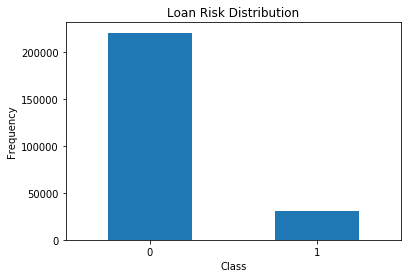

In [55]:
count_classes = pd.value_counts(train_data['risk_flag'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Loan Risk Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [56]:
default = train_data[train_data['risk_flag']==1]
normal = train_data[train_data['risk_flag']==0]

X_train_before = X_train
y_train_before = y_train

In [57]:
print(default.shape,normal.shape)

(30996, 376) (221004, 376)


In [22]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\jasee\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


In [58]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=1)
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [59]:
from collections import Counter

print(Counter(y_under))

Counter({0: 30996, 1: 30996})


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
rf = ExtraTreesClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
y_submit = rf.predict(test_data)

In [ ]:
y_submit_csv = pd.DataFrame(y_submit)
y_submit_csv['id'] = y_submit_csv.index + 1
y_submit_csv = y_submit_csv[['id', 0]]
y_submit_csv.columns = ['id', 'risk_flag']
y_submit_csv = y_submit_csv.reset_index(drop=True)

In [ ]:
y_submit_csv.head(50)

In [ ]:
y_submit_csv.to_csv('submission.csv',index=False)